<a href="https://colab.research.google.com/github/Bgisemba/CatvsDog-Classifiaction/blob/modelling/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting the Dataset

In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats-redux-kernels-edition.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#extracting the compressed train dataset
from zipfile import ZipFile

dataset = '/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Train dataset is extracted')

The Train dataset is extracted


In [ ]:
#extracting the compressed test dataset
from zipfile import ZipFile

dataset = '/test.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Test dataset is extracted')


The Test dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [13]:
#printing name of images
file_names = os.listdir('/content/train')
print(file_names)

['dog.3147.jpg', 'cat.276.jpg', 'cat.2669.jpg', 'cat.6641.jpg', 'cat.3432.jpg', 'cat.7230.jpg', 'dog.10682.jpg', 'dog.10061.jpg', 'cat.91.jpg', 'cat.25.jpg', 'cat.4961.jpg', 'dog.9685.jpg', 'cat.10800.jpg', 'cat.11665.jpg', 'cat.1406.jpg', 'dog.2102.jpg', 'dog.11407.jpg', 'dog.6634.jpg', 'dog.3552.jpg', 'cat.9987.jpg', 'dog.8172.jpg', 'cat.2492.jpg', 'cat.3354.jpg', 'cat.3197.jpg', 'cat.161.jpg', 'cat.5370.jpg', 'dog.4959.jpg', 'dog.6298.jpg', 'dog.7317.jpg', 'cat.1824.jpg', 'cat.9714.jpg', 'cat.4858.jpg', 'cat.5019.jpg', 'dog.10888.jpg', 'cat.11202.jpg', 'dog.11469.jpg', 'dog.8309.jpg', 'dog.8843.jpg', 'dog.136.jpg', 'cat.11562.jpg', 'cat.716.jpg', 'cat.10086.jpg', 'cat.3342.jpg', 'cat.8338.jpg', 'cat.4909.jpg', 'dog.12393.jpg', 'cat.8618.jpg', 'dog.9915.jpg', 'cat.11712.jpg', 'dog.8791.jpg', 'dog.11499.jpg', 'cat.9118.jpg', 'cat.11871.jpg', 'dog.3279.jpg', 'dog.11587.jpg', 'cat.8900.jpg', 'cat.2899.jpg', 'cat.5574.jpg', 'cat.6658.jpg', 'cat.12236.jpg', 'cat.2346.jpg', 'cat.2603.jpg',

## Importing Libraries

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


## Displaying the Images

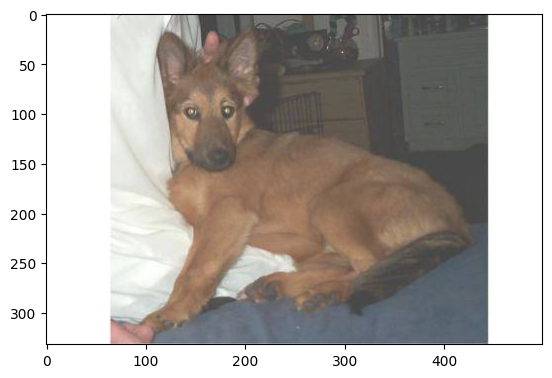

In [22]:
# display dog image
img = mpimg.imread('/content/train/dog.10888.jpg')
imgplt = plt.imshow(img)
plt.show()

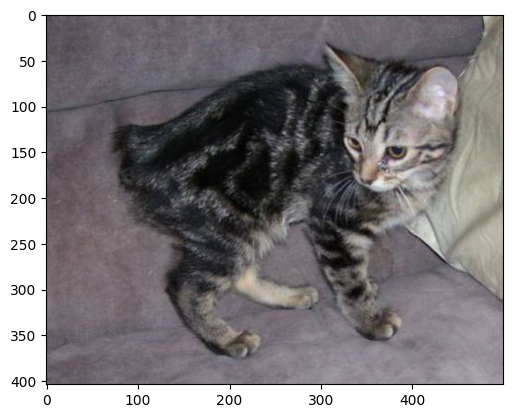

In [23]:
# display cat image
img = mpimg.imread('/content/train/cat.276.jpg')
imgplt = plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('train')

for i in range(5):

  name = file_names[i]
  print(name)
  print(name[0:3])


dog.3147.jpg
dog
cat.276.jpg
cat
cat.2669.jpg
cat
cat.6641.jpg
cat
cat.3432.jpg
cat


In [17]:
#finding the number of cat and dog images
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [21]:
#printing name of images
file_names_ = os.listdir('/content/image resized')
print(file_names_)

['cat.276.jpg', 'cat.7230.jpg', 'dog.10888.jpg', 'dog.136.jpg', 'cat.716.jpg', 'dog.12393.jpg', 'cat.5574.jpg', 'cat.905.jpg', 'cat.10038.jpg', 'cat.2844.jpg', 'dog.6623.jpg', 'dog.7085.jpg', 'dog.367.jpg', 'dog.11.jpg', 'dog.5117.jpg', 'cat.1817.jpg', 'dog.6105.jpg', 'dog.10078.jpg', 'cat.11882.jpg', 'dog.1623.jpg', 'dog.11599.jpg', 'cat.10483.jpg', 'dog.3404.jpg', 'dog.12145.jpg', 'dog.3685.jpg', 'cat.9968.jpg', 'cat.10457.jpg', 'cat.3738.jpg', 'cat.683.jpg', 'dog.12127.jpg', 'dog.11747.jpg', 'dog.9125.jpg', 'dog.8407.jpg', 'dog.3805.jpg', 'cat.12067.jpg', 'dog.6227.jpg', 'cat.4747.jpg', 'cat.11299.jpg', 'cat.4337.jpg', 'dog.9643.jpg', 'dog.10863.jpg', 'dog.4719.jpg', 'dog.7208.jpg', 'dog.12314.jpg', 'dog.9180.jpg', 'dog.6567.jpg', 'dog.10274.jpg', 'dog.11313.jpg', 'cat.10779.jpg', 'cat.4835.jpg', 'cat.4052.jpg', 'cat.11038.jpg', 'cat.12189.jpg', 'cat.3765.jpg', 'dog.2051.jpg', 'cat.9579.jpg', 'cat.5746.jpg', 'dog.9145.jpg', 'dog.2996.jpg', 'cat.6791.jpg', 'dog.2155.jpg', 'cat.11594.

## Resizing the images

In [18]:
#creating a directory for resized images
os.mkdir('image resized')

In [19]:
import os
import random
from PIL import Image

#Define folders
original_folder = '/content/train'
resized_folder = '/content/image resized/'

# Ensure the resized folder exists
os.makedirs(resized_folder, exist_ok=True)

# Get all image filenames from the original folder
file_names = os.listdir(original_folder)

# Shuffle the file names to ensure randomness
random.shuffle(file_names)

# Process the first 2000 images randomly
for i, filename in enumerate(file_names[:2000]):
    img_path = os.path.join(original_folder, filename)

    try:
        # Open, resize, and convert the image
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = img.convert('RGB')

        # Save the resized image to the new folder
        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)

        #print(f"{i+1}: Resized and saved {filename}")

    except Exception as e:
        # Handle errors (e.g., non-image files or corrupted files)
        print(f"Error processing {filename}: {e}")


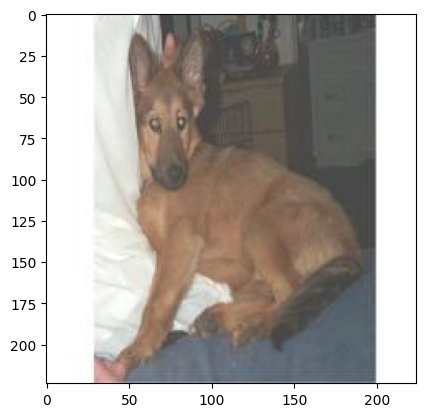

In [24]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10888.jpg')
imgplt = plt.imshow(img)
plt.show()

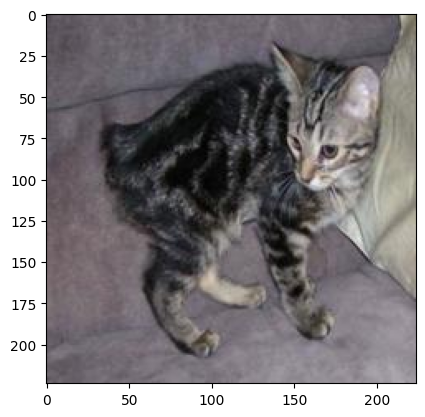

In [25]:
# display cat image
img = mpimg.imread('/content/image resized/cat.276.jpg')
imgplt = plt.imshow(img)
plt.show()

## Creating Labels

In [26]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

Dog-1
Cat-0

In [27]:
print(filenames[0:5])
print(len(filenames))

['cat.276.jpg', 'cat.7230.jpg', 'dog.10888.jpg', 'dog.136.jpg', 'cat.716.jpg']
2000


In [28]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 0]
2000


In [29]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1028  972]


## Converting resized image to numpy arrays

In [73]:
import cv2
import glob

In [ ]:

#image_directory = 'image resized'
#image_extension = ['png', 'jpg']

#files = []

#[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

#dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
#print(dog_cat_images)

In [30]:
from PIL import Image
import numpy as np
import os

image_directory = 'image resized/'
image_extensions = ['png', 'jpg']  # Add other extensions if needed

files = [os.path.join(image_directory, f) for f in os.listdir(image_directory)
         if f.split('.')[-1] in image_extensions]

# Read images and convert to arrays
dog_cat_images_1 = np.array([np.array(Image.open(file)) for file in files])

print(f"Loaded {len(dog_cat_images_1)} images.")


Loaded 2000 images.


In [ ]:
#print(dog_cat_images_1)

In [31]:
type(dog_cat_images_1)

numpy.ndarray

In [33]:
print(dog_cat_images_1.shape)

(2000, 224, 224, 3)


In [34]:
#defining the independent and target variable
X = dog_cat_images_1
Y = np.asarray(labels)

## Modelling

In [35]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600-training images
400-test images

In [37]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
#print(X_train_scaled)

In [38]:
# Bulding Neural Network
import tensorflow as tf
import tensorflow_hub as hub

In [46]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.17.1
TensorFlow Hub version: 0.16.1


In [52]:
import warnings
from keras import layers
from keras.models import Model
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import shuffle

warnings.filterwarnings('ignore')

In [54]:
#img_shape = (224,224,3)

In [55]:
#base_model = vgg19.VGG19 (include_top = False,
                             # weights = 'imagenet',
                             # input_shape=(img_shape))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
#base_model.trainable=False

In [58]:
#from tensorflow import keras

In [59]:
#model = keras.models.Sequential([
    #base_model,
    #layers.Flatten(),
    #layers.Dense(1, activation='sigmoid')],
    #name= base_model.name)

In [60]:
#model.compile(optimizer='adam',
              #loss='binary_crossentropy',  # binary_crossentropy (log loss)
              #metrics=['accuracy'])

In [61]:
#model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [62]:
#from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [63]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
#early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [68]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model with pretrained weights from ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers (optional, if you don't want to fine-tune them initially)
base_model.trainable = False
num_of_classes=2
# Build the Sequential model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_of_classes)
])




# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [69]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6628 - loss: 1.5135
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8127 - loss: 0.6930
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7657 - loss: 0.6928
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7818 - loss: 0.6930
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7971 - loss: 0.6931


In [70]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7923 - loss: 0.6931
Test Loss = 0.6931471824645996
Test Accuracy = 0.7875000238418579


In [76]:
from google.colab.patches import cv2_imshow

## Predictive System

Path of the image to be predicted: /content/cat.jpg


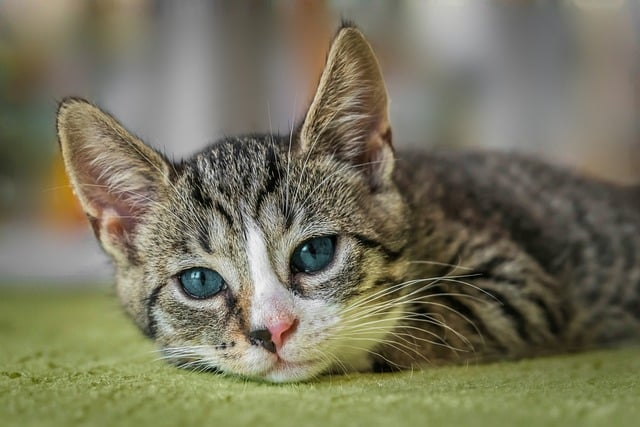

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[-2.4863367 -2.8862839]]
0
The image represents a Cat


In [77]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/images.jfif


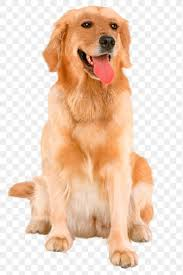

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[-4.420287 -3.341059]]
1
The image represents a Dog


In [78]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')